In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load the .npy file
# data = np.load('Dataset.npy')
data = np.load('data/Dataset.npy')
# data = data[0:100000]
print(data)

In [ ]:
# Manipulate the data into a dataframe
df = pd.DataFrame([x.split(',') for x in data], columns=['User_ID', 'Movie_ID', 'Rating', 'Date'])
print(df)

In [4]:
# Get unique users, movies

unique_users = df['User_ID'].unique()
print("Unique Users ",len(unique_users))

unique_users = df['Movie_ID'].unique()
print("Unique Movies ",len(unique_users))

unique_users = df['Rating'].unique()
print("Unique Ratings ",len(unique_users))

dates = df['Date'].unique()
print("Unique Dates ",len(dates))

Unique Users  1499238
Unique Movies  351109
Unique Ratings  10
Unique Dates  8028


In [5]:
# Get users that have more than 100 ratings and 500 ratings
Rmin = 100
Rmax = 1500

# Count the frequency of each user in the dataset
user_counts = df['User_ID'].value_counts()

# Filter the DataFrame to only include users that appear more than 100 times and less than 300
users_between_Rmin_and_Rmax = user_counts[(user_counts > Rmin) & (user_counts < Rmax)].index.tolist()

# Print the resulting list of users
print(users_between_Rmin_and_Rmax)


['ur23018536', 'ur25105932', 'ur6201371', 'ur2444068', 'ur34049683', 'ur44112735', 'ur4915915', 'ur6141756', 'ur67430579', 'ur23887409', 'ur34967775', 'ur0331289', 'ur44588015', 'ur4405474', 'ur13371508', 'ur34845698', 'ur29385135', 'ur0375636', 'ur4465293', 'ur0306861', 'ur27175177', 'ur0850869', 'ur20327151', 'ur0855231', 'ur1530907', 'ur1773414', 'ur46842921', 'ur66111139', 'ur1803589', 'ur56005872', 'ur3072427', 'ur7826013', 'ur3741220', 'ur28260582', 'ur57590728', 'ur1173088', 'ur20748638', 'ur3836774', 'ur18044142', 'ur1609079', 'ur0345596', 'ur0178741', 'ur25790270', 'ur8625456', 'ur2263198', 'ur0562732', 'ur2496397', 'ur0442119', 'ur13538926', 'ur34836174', 'ur19892892', 'ur32544613', 'ur0070535', 'ur26820801', 'ur1581184', 'ur20817083', 'ur2626332', 'ur8462477', 'ur2843647', 'ur0102677', 'ur94289145', 'ur57691865', 'ur13035875', 'ur45707659', 'ur5232724', 'ur4716150', 'ur53053227', 'ur1132073', 'ur3902771', 'ur59627333', 'ur0491610', 'ur0543054', 'ur1019294', 'ur17571044', 'ur

In [6]:
# Filter the DataFrame to only include users that appear more than 100 times and less than 300
df_selected_users = df[df['User_ID'].isin(users_between_Rmin_and_Rmax)]
print(df_selected_users)

           User_ID   Movie_ID Rating             Date
1        ur3174947  tt0118688      3  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
8        ur3174947  tt0120601      8  16 January 2005
18       ur3174947  tt0182789      9  16 January 2005
26       ur3174947  tt0265086      8  16 January 2005
...            ...        ...    ...              ...
4669810  ur3174947  tt0103772      8  16 January 2005
4669813  ur0581842  tt0068424      4  16 January 2005
4669814  ur3174947  tt0096895      8  16 January 2005
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005

[818621 rows x 4 columns]


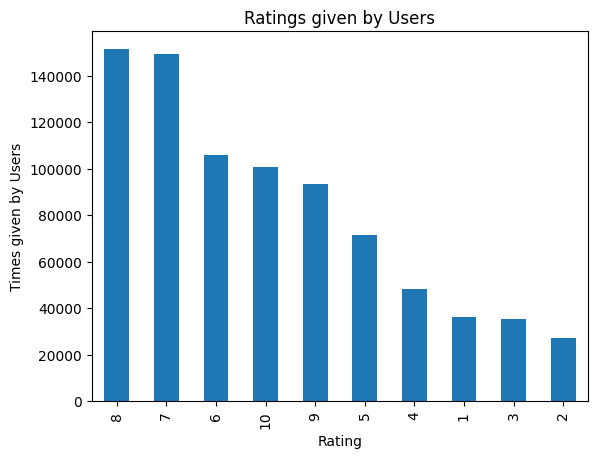

In [7]:
# count the number of occurrences of each rating
rating_counts = df_selected_users['Rating'].value_counts()

# plot a histogram
rating_counts.plot(kind='bar')
# set plot title and axis labels
plt.title('Ratings given by Users')
plt.xlabel('Rating')
plt.ylabel('Times given by Users')

# display the plot
plt.show()

In [8]:
print(df_selected_users)
unique_ratings = df_selected_users['Rating'].unique()

# print the unique ratings
print(unique_ratings)

           User_ID   Movie_ID Rating             Date
1        ur3174947  tt0118688      3  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
8        ur3174947  tt0120601      8  16 January 2005
18       ur3174947  tt0182789      9  16 January 2005
26       ur3174947  tt0265086      8  16 January 2005
...            ...        ...    ...              ...
4669810  ur3174947  tt0103772      8  16 January 2005
4669813  ur0581842  tt0068424      4  16 January 2005
4669814  ur3174947  tt0096895      8  16 January 2005
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005

[818621 rows x 4 columns]
['3' '8' '9' '10' '6' '2' '1' '7' '5' '4']


In [9]:
# count the number of occurrences of each User
user_counts = df_selected_users['User_ID'].value_counts()
len(user_counts)

3007

/tmp/ipykernel_1075332/3900238028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]


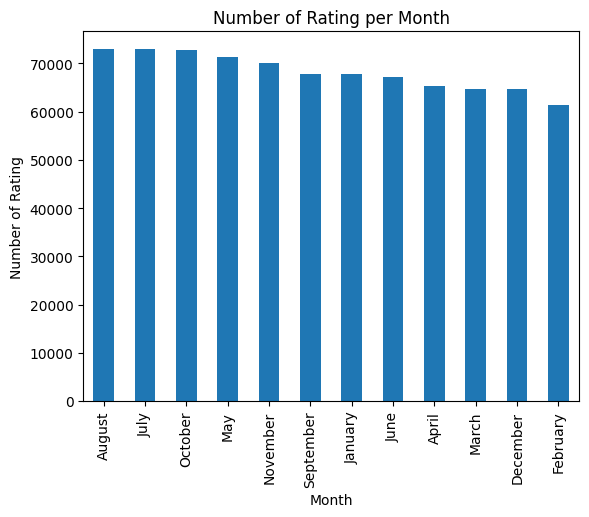

In [10]:
# Adding new column month
df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]
# print(df_selected_users)

month_counts = df_selected_users['Month'].value_counts()

# plot a histogram
month_counts.plot(kind='bar')
# set plot title and axis labels
plt.title('Number of Rating per Month')
plt.ylabel('Number of Rating')
plt.xlabel('Month')

# display the plot
plt.show()

In [11]:
# Ενναλακτικη Αναπαρασταση Δεδομένων

# drop duplicates
# df_grouped = df_selected_users.groupby(['User_ID', 'Movie_ID']).agg({'Rating': 'mean'}).reset_index()
# print(df_grouped)

In [12]:
df_grouped=df_selected_users

# drop duplicates
df_grouped = df_grouped.drop_duplicates(subset=['User_ID', 'Movie_ID'])
df_grouped

,User_ID,Movie_ID,Rating,Date,Month
1,ur3174947,tt0118688,3,16 January 2005,January
4,ur3174947,tt0094721,8,16 January 2005,January
8,ur3174947,tt0120601,8,16 January 2005,January
18,ur3174947,tt0182789,9,16 January 2005,January
26,ur3174947,tt0265086,8,16 January 2005,January
...,...,...,...,...,...
4669810,ur3174947,tt0103772,8,16 January 2005,January
4669813,ur0581842,tt0068424,4,16 January 2005,January
4669814,ur3174947,tt0096895,8,16 January 2005,January
4669815,ur0581842,tt0107977,6,16 January 2005,January


In [13]:
# pivot the table
R = df_grouped.pivot(index='User_ID', columns='Movie_ID', values='Rating')
R

Movie_ID,tt0000001,tt0000003,tt0000005,tt0000007,tt0000008,tt0000010,tt0000012,tt0000013,tt0000014,tt0000015,...,tt9913036,tt9913038,tt9913040,tt9913050,tt9913754,tt9914414,tt9914598,tt9915686,tt9916190,tt9916204
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0001220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0002746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0004646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur9972457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur99782462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur99809306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop movies that are rated by 50 users at least
counts = R.count()
# set a threshold value 
threshold = 50
# filter the columns based on the threshold value
filtered_df = R.loc[:, counts >= threshold]
# print the filtered DataFrame
print(filtered_df.shape)

In [ ]:
R = filtered_df

In [ ]:
# How many nan values i have
# num_nan = np.count_nonzero(np.isnan(R))
# print(num_nan)

# # How many non nan values i have
# num_non_nan = np.count_nonzero(~np.isnan(R))
# print(num_non_nan)


In [16]:
# drop columns where all values are NaN
R = R.dropna(axis=1, how='all')

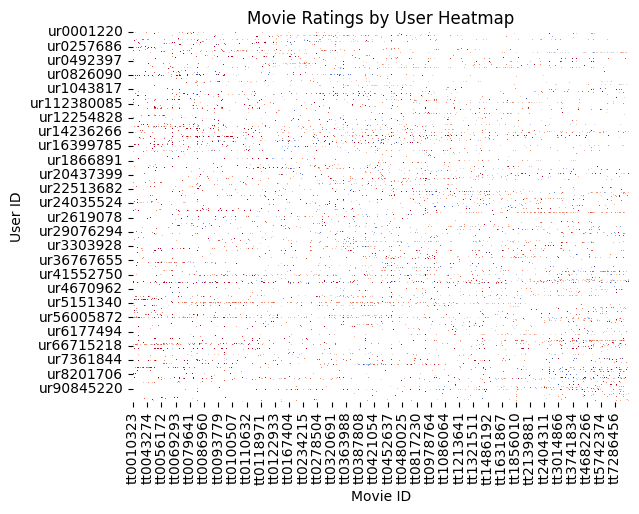

In [17]:
# We are ploting a heatmap but we can't see a lot!
R_numeric = R.apply(pd.to_numeric)
sns.heatmap(R_numeric, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

In [18]:
R.shape

(3007, 2974)

In [19]:
# replace missing values with 0
R.fillna(0, inplace=True)
R

Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9072352,tt9086228,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0001220,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0002746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0003136,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0003696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0004646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur9972457,0,8,0,9,0,0,8,9,0,0,...,0,0,0,0,0,0,0,0,0,0
ur99782462,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,5,0
ur99809306,0,0,0,0,0,0,0,0,0,0,...,0,4,5,0,0,0,0,0,0,0


## Doing the clustering

In [20]:
# normalize the data
# df_norm = (R - R.mean()) / R.std()
df_norm = R

### Use euclidiean distance with K-means

In [ ]:
# Determine the optimal number of clusters using the elbow method
ssd = []
for k in range(1, 18):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(df_norm)
    ssd.append(kmeans.inertia_)
    
# Plot the SSD vs. the number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 18), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ευκλείδεια αποσταση')
plt.show()

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/si

Unexpected exception formatting exception. Falling back to standard exception


/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Traceback (most recent call last):
  File "/home/panos/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/panos/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/panos/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/panos/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1030, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
  File "

Unexpected exception formatting exception. Falling back to standard exception


In [ ]:
# cluster the users using k-means
kmeans = KMeans(n_clusters=12, random_state=0)
clusters = kmeans.fit_predict(df_norm)

In [ ]:
# add the cluster labels to the dataframe
R['cluster'] = clusters

# print the number of users in each cluster
print(R['cluster'].value_counts())

# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_norm)

# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()


</br>
<h3>It seems visually that we have some teams of users that we will now visualise to get some insigths</h3>
</br>


In [ ]:
# Lets create some of our teams
R = R.apply(pd.to_numeric)
UA = R[R['cluster'] == 1]
UB = R[R['cluster'] == 0]
UC = R[R['cluster'] == 3]
UD = R[R['cluster'] == 4]

In [ ]:
UD

In [ ]:
UC

## Exploring our different clusters with heatmaps

## USER GROUP C

In [ ]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UC, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

### It is clear from the heatmap that users like more the movies on the right side

## USER GROUP D

In [ ]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UD, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

## USER GROUP A

In [ ]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UA, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


# First we will build a Neural Network for 1 cluster of users

In [ ]:
# We will use UC
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(UD.iloc[:, :-1], UD.iloc[:, -1], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean squared error is:', loss)

In [ ]:
pip install pydot

In [ ]:
# plot Neural Network
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)